# How are in-demand Skills Trending for Data Jobs Month by Month?

### Methodology
 1. Aggregate skill counts monthly
 2. Analyze based on percentage of total jobs month by month
 3. Plot the monthly skill demand

In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
list_countries = [
    "Austria",
    "Belgium",
    "Bulgaria",
    "Croatia",
    "Cyprus",
    "Czech Republic",
    "Denmark",
    "Estonia",
    "Finland",
    "France",
    "Germany",
    "Greece",
    "Hungary",
    "Ireland",
    "Italy",
    "Latvia",
    "Lithuania",
    "Luxembourg",
    "Malta",
    "Netherlands",
    "Poland",
    "Portugal",
    "Romania",
    "Slovakia",
    "Slovenia",
    "Spain",
    "Sweden"
]

jobs_top4 = ['Business Analyst', 'Data Analyst', 'Data Engineer', 'Data Scientist']

df_EU_top4 = df[df['job_country'].isin(list_countries) & df['job_title_short'].isin(jobs_top4)].copy()

In [4]:
df_EU_top4['job_month'] = df_EU_top4['job_posted_date'].dt.month

In [5]:
df_exploded = df_EU_top4.explode('job_skills')

In [6]:
top4_pivot = df_exploded.pivot_table(index='job_month', columns='job_skills', aggfunc='size', fill_value=0)
top4_pivot.loc['Total'] = top4_pivot.sum()
top4_pivot = top4_pivot[top4_pivot.loc['Total'].sort_values(ascending=False).index]
top4_pivot = top4_pivot.drop('Total')
top4_pivot

job_skills,python,sql,azure,power bi,aws,r,excel,tableau,spark,sas,...,nuxt.js,xamarin,dingtalk,esquisse,linode,wimi,workfront,play framework,ringcentral,capacitor
job_month,,,,,,,,,,,,,,,,,,,,,
1,10311,10003,4083,2816,3337,3160,2871,2807,3149,2102,...,1,0,0,0,0,0,0,0,0,0
2,7371,7256,2885,2234,2315,2312,2199,2230,2241,1684,...,0,0,0,0,0,0,0,0,1,0
3,7332,7139,2801,2192,2264,2350,2148,2082,2126,1660,...,0,0,0,0,0,0,0,0,0,0
4,6861,6766,2734,2180,2129,2191,2144,1940,1951,1462,...,0,0,0,0,0,0,1,0,0,0
5,5815,5701,2239,1791,1884,1774,1710,1643,1604,1136,...,0,0,0,0,0,0,0,0,0,0
6,6703,6675,2554,2177,2126,2078,2127,1938,1866,1320,...,0,0,0,0,0,0,0,0,0,0
7,6196,6168,2336,2090,1971,2053,2005,1944,1593,1250,...,0,0,0,0,0,0,0,0,0,0
8,6445,6441,2534,2084,2062,2064,2148,1888,1769,1268,...,0,0,0,0,0,0,0,1,0,0
9,5406,5334,2164,1759,1628,1627,1647,1446,1464,1036,...,0,1,0,0,1,0,0,0,0,0


In [7]:
top4_totals = df_EU_top4.groupby('job_month').size()

In [8]:
top4_percent = top4_pivot.div(top4_totals/100, axis=0)
df_final_plot = top4_percent.iloc[:, :7]

In [9]:
import seaborn as sns

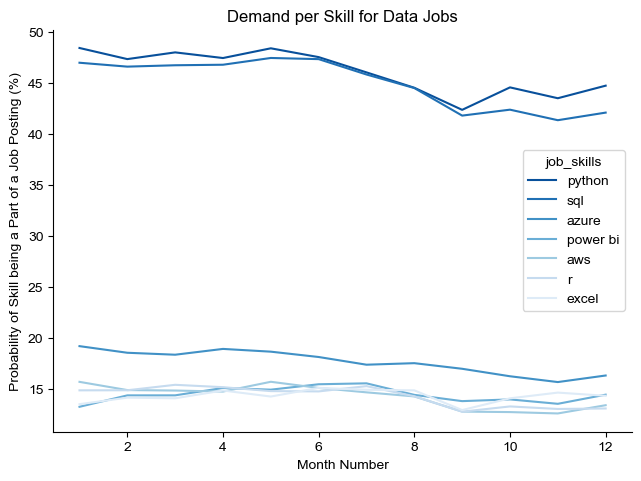

In [10]:
palette = sns.color_palette("Blues", n_colors=7)

reversed_palette = palette[::-1]

sns.lineplot(data=df_final_plot, dashes=False, palette=reversed_palette)
sns.set_theme(style= 'ticks')
sns.despine()

plt.tight_layout()

plt.title('Demand per Skill for Data Jobs')
plt.ylabel('Probability of Skill being a Part of a Job Posting (%)')
plt.xlabel('Month Number')

plt.show()

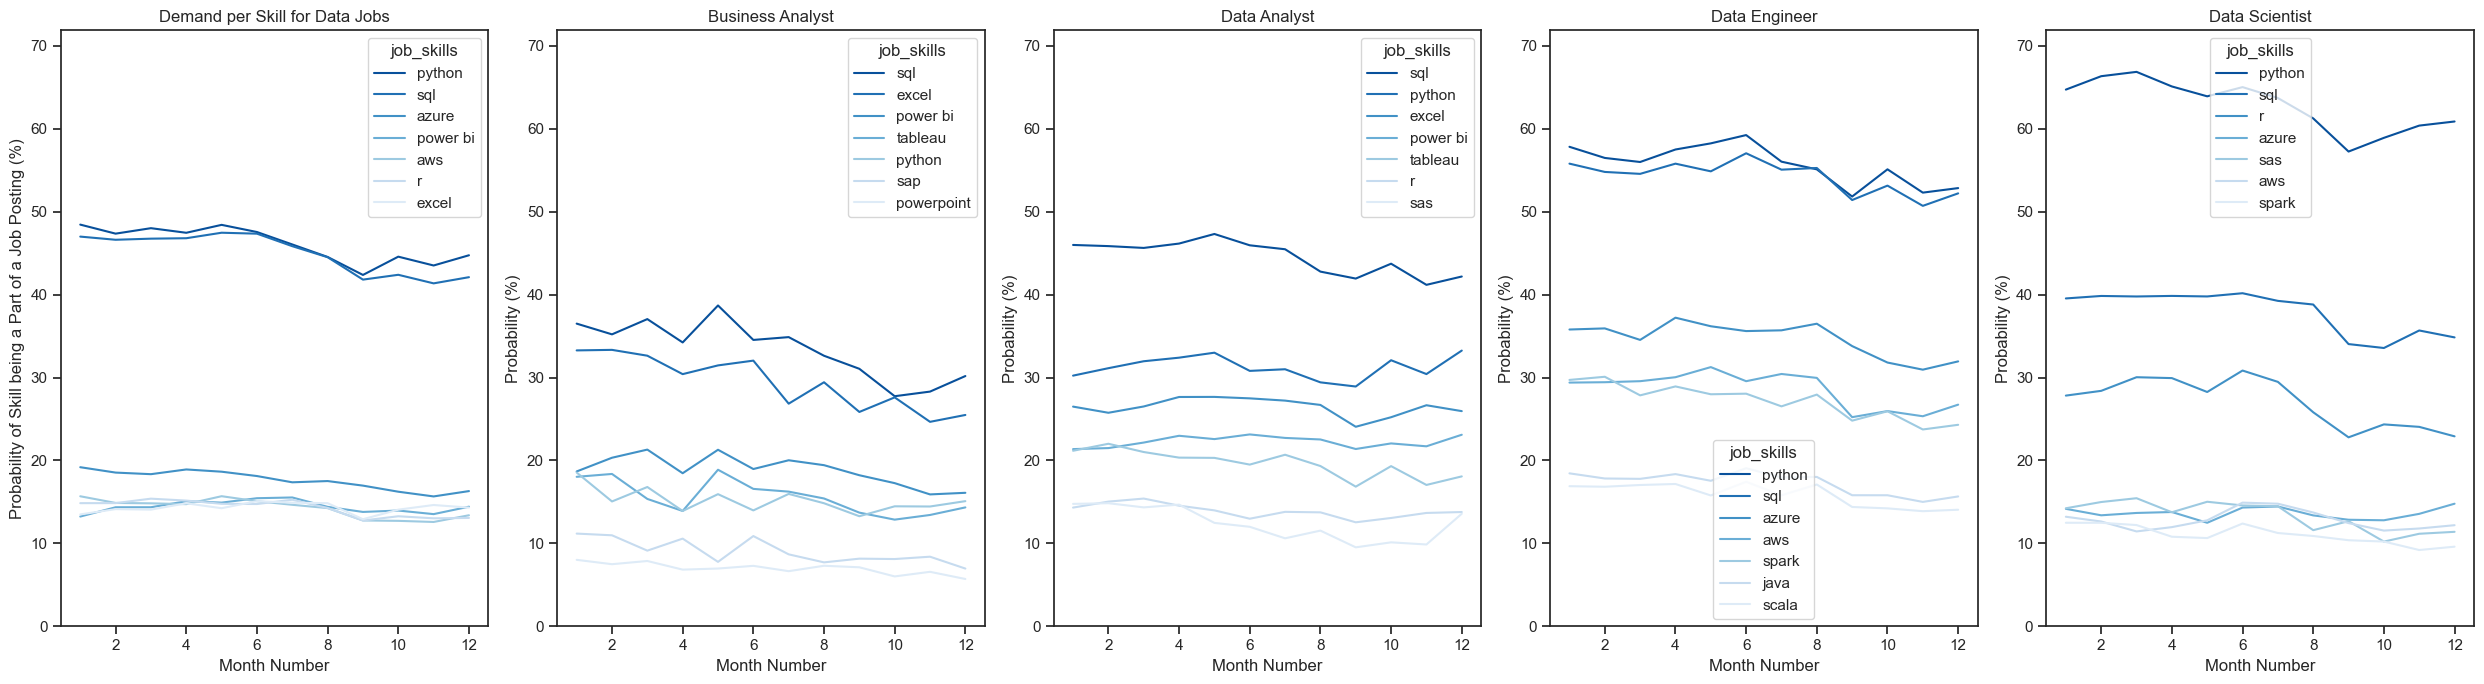

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 7))

palette = sns.color_palette("Blues", n_colors=7)[::-1]
sns.lineplot(data=df_final_plot, dashes=False, palette=palette, ax=axes[0])
axes[0].set_title('Demand per Skill for Data Jobs')
axes[0].set_ylabel('Probability of Skill being a Part of a Job Posting (%)')
axes[0].set_xlabel('Month Number')

y_values = []

for i, job in enumerate(jobs_top4):
    df_role = df_EU_top4[df_EU_top4['job_title_short'] == job].copy()
    df_role['job_month'] = df_role['job_posted_date'].dt.month
    df_exploded_role = df_role.explode('job_skills')
    
    role_pivot = df_exploded_role.pivot_table(index='job_month', columns='job_skills', aggfunc='size', fill_value=0)
    role_pivot.loc['Total'] = role_pivot.sum()
    role_pivot = role_pivot[role_pivot.loc['Total'].sort_values(ascending=False).index]
    role_pivot = role_pivot.drop('Total')

    role_totals = df_role.groupby('job_month').size()
    role_percent = role_pivot.div(role_totals / 100, axis=0)

    max_y_value = role_percent.max().max()
    y_values.append(max_y_value+5)
    
    sns.lineplot(data=role_percent.iloc[:, :7], dashes=False, palette=palette, ax=axes[i + 1])
    axes[i + 1].set_title(job)
    axes[i + 1].set_ylabel('Probability (%)')
    axes[i + 1].set_xlabel('Month Number')

overall_y_limit = (0, max(y_values))
for ax in axes:
    ax.set_ylim(overall_y_limit)

plt.tight_layout()
plt.show()

##### This visualization is quite small in the notebook, but you can access this and all other graphs in The Graph Pictures folder 

In [12]:
import numpy as np

skill_totals = top4_pivot.sum(axis=0)
filtered_skills = skill_totals[skill_totals >= 50].index
top4_pivot = top4_pivot[filtered_skills]

december_values = top4_pivot.loc[12]
january_values = top4_pivot.loc[1]
trend_index = (december_values / january_values).replace([np.inf, -np.inf], np.nan)
percentage_change = (trend_index - 1) * 100

trend_df = pd.DataFrame({
    'Trend Index': trend_index,
    'Percentage Change': percentage_change
})

trend_df = trend_df.sort_values(by='Trend Index', ascending=False).head(7)
trend_df

,Trend Index,Percentage Change
job_skills,,
sass,2.000000,100.000000
notion,1.766667,76.666667
debian,1.600000,60.000000
lua,1.571429,57.142857
colocation,1.500000,50.000000
theano,1.333333,33.333333
mxnet,1.142857,14.285714


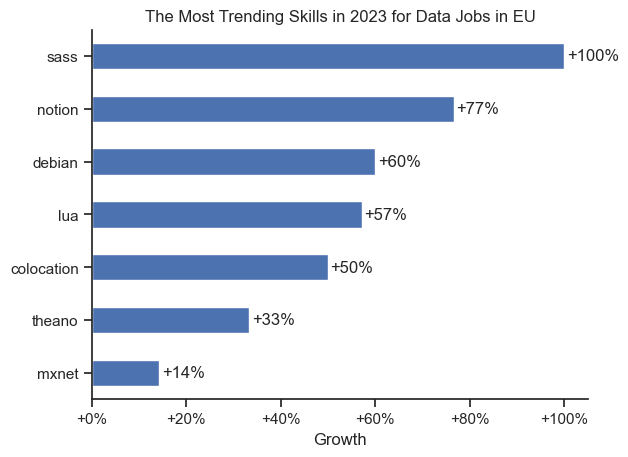

In [14]:
trend_df['Percentage Change'].plot(kind='barh')

def percentage_formatter(x, pos):
    return f'+{x:.0f}%'

sns.set_theme(style= 'ticks')
sns.despine()

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(percentage_formatter))

plt.title('The Most Trending Skills in 2023 for Data Jobs in EU')
plt.xlabel('Growth')
plt.ylabel('')

for i, v in enumerate(trend_df['Percentage Change']):
    ax.text(v + 0.5, i, f'+{v:.0f}%', va='center')

ax.invert_yaxis()

plt.show()